## Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.linear_model import LinearRegression
sys.path.append('../')

## Reading Dataset

In [2]:
df = pd.read_csv("../datasets/calculated_features_final19356_253493_147567893553946290238604574175400014296.csv")
print(list(df.columns))
print(df.shape)

['scout_id', 'match_week', 'player_id', 'team_id', 'delta_price', 'position_id', 'year', 'name', 'has_played', 'score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'team_points_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', 'team_goals_taken_last_1_rounds.1', 'average_plays_last_1_rounds_rb_play', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg_play', 'average_plays_last_1_rounds_dd_play', 'average_plays_last_1_rounds_dp_play', 'average_plays_last_1_rounds_gs_play', 'average_plays_last_1_rounds_fs_play', 'average_plays_last_1_rounds_pe_play', 'average_plays_last_1_rounds_a_play', 'average_plays_last_1_rounds_ft_play', 'average_plays_last_1_rounds_fd_play', 'average_plays_last_1_ro

## Pre Processing

In [3]:
auxiliary = ['scout_id', 'match_week', 'player_id', 'team_id', 'position_id',
             'home_team.1', 'home_team.2', 'home_team.3', 'year', 'name', 'has_played',
             'team_goals_taken_last_1_rounds.1', 'team_goals_taken_last_5_rounds.1',
             'team_goals_taken_last_10_rounds.1', 'team_goals_taken_last_20_rounds.1', 'delta_price']

In [4]:
from data_science_utils.data_processing.data_processing import DatasetProcessing
dp = DatasetProcessing(df, auxiliary)
dp.correct_dataset()
dp.count_null()
dp.drop_zero_var()
dp.drop_null(max_null_ratio=0.4)
df = dp.hot_encode()
dp.fill_null(value = 0, feature_list=list(df.columns))

average_points_last_1_rounds......................1775
average_price_last_1_rounds.......................1775
team_points_last_1_rounds.........................770
team_goals_scored_last_1_rounds...................770
team_goals_taken_last_1_rounds....................770
enemy_goals_scored_last_1_rounds..................819
enemy_goals_taken_last_1_rounds...................819
enemy_points_last_1_rounds........................819
home_team.........................................241
average_plays_last_1_rounds_rb_play...............1775
average_plays_last_1_rounds_fc_play...............1775
average_plays_last_1_rounds_gc_play...............1775
average_plays_last_1_rounds_ca_play...............1775
average_plays_last_1_rounds_cv_play...............1775
average_plays_last_1_rounds_sg_play...............1775
average_plays_last_1_rounds_dd_play...............1775
average_plays_last_1_rounds_dp_play...............1775
average_plays_last_1_rounds_gs_play...............1775
average_plays_las

../data_science_utils/data_processing/data_processing.py:53: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  enc.fit(self.df.position_id.reshape(-1, 1))
../data_science_utils/data_processing/data_processing.py:54: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  position_encoded = enc.transform(self.df.position_id.reshape(-1, 1)).toarray()




FEATURES FILLED WITH 0



In [5]:
print(df.shape)

(32733, 114)


In [6]:
list(df.position_id.value_counts().index)
df.loc[df['position_id'] == 4].score.mean()

2.2041426485281685

## Feature Visualization

In [7]:
from data_science_utils.feature_analysis.visualization import FeatureVisualization
fv = FeatureVisualization(df, auxiliary)

/home/noixd/Projects/cartolaAPI/env_cartola/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
# fv.dataset_visualization(num_lags=500, features_to_plot=list(df.columns))

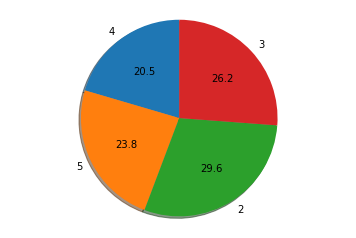

In [9]:
fv.pizza_graph(col='position_id', show=True)

## Feature Selection

In [10]:
from data_science_utils.feature_analysis.selection import FeatureSelection
fs = FeatureSelection(df, auxiliary)

In [11]:
fs.rank_correlation()

Feature Correlation with Target:
average_points_last_10_rounds.....................0.142943093918
average_points_last_20_rounds.....................0.12982347211
average_points_last_5_rounds......................0.129641414053
average_price_last_5_rounds.......................0.12724850705
average_price_last_1_rounds.......................0.122770509212
average_price_last_10_rounds......................0.11891890538
home_team.........................................0.115866923319
average_plays_last_10_rounds_fs_play..............0.10362695655
average_plays_last_5_rounds_fs_play...............0.100096968583
average_plays_last_10_rounds_pe_play..............0.098063180483
average_price_last_20_rounds......................0.0963420624595
average_plays_last_20_rounds_fs_play..............0.0953840486918
average_plays_last_5_rounds_pe_play...............0.094760532377
average_plays_last_10_rounds_rb_play..............0.0881960710554
average_plays_last_20_rounds_pe_play..............0.087489

In [12]:
# fs.one_feat_classifier()

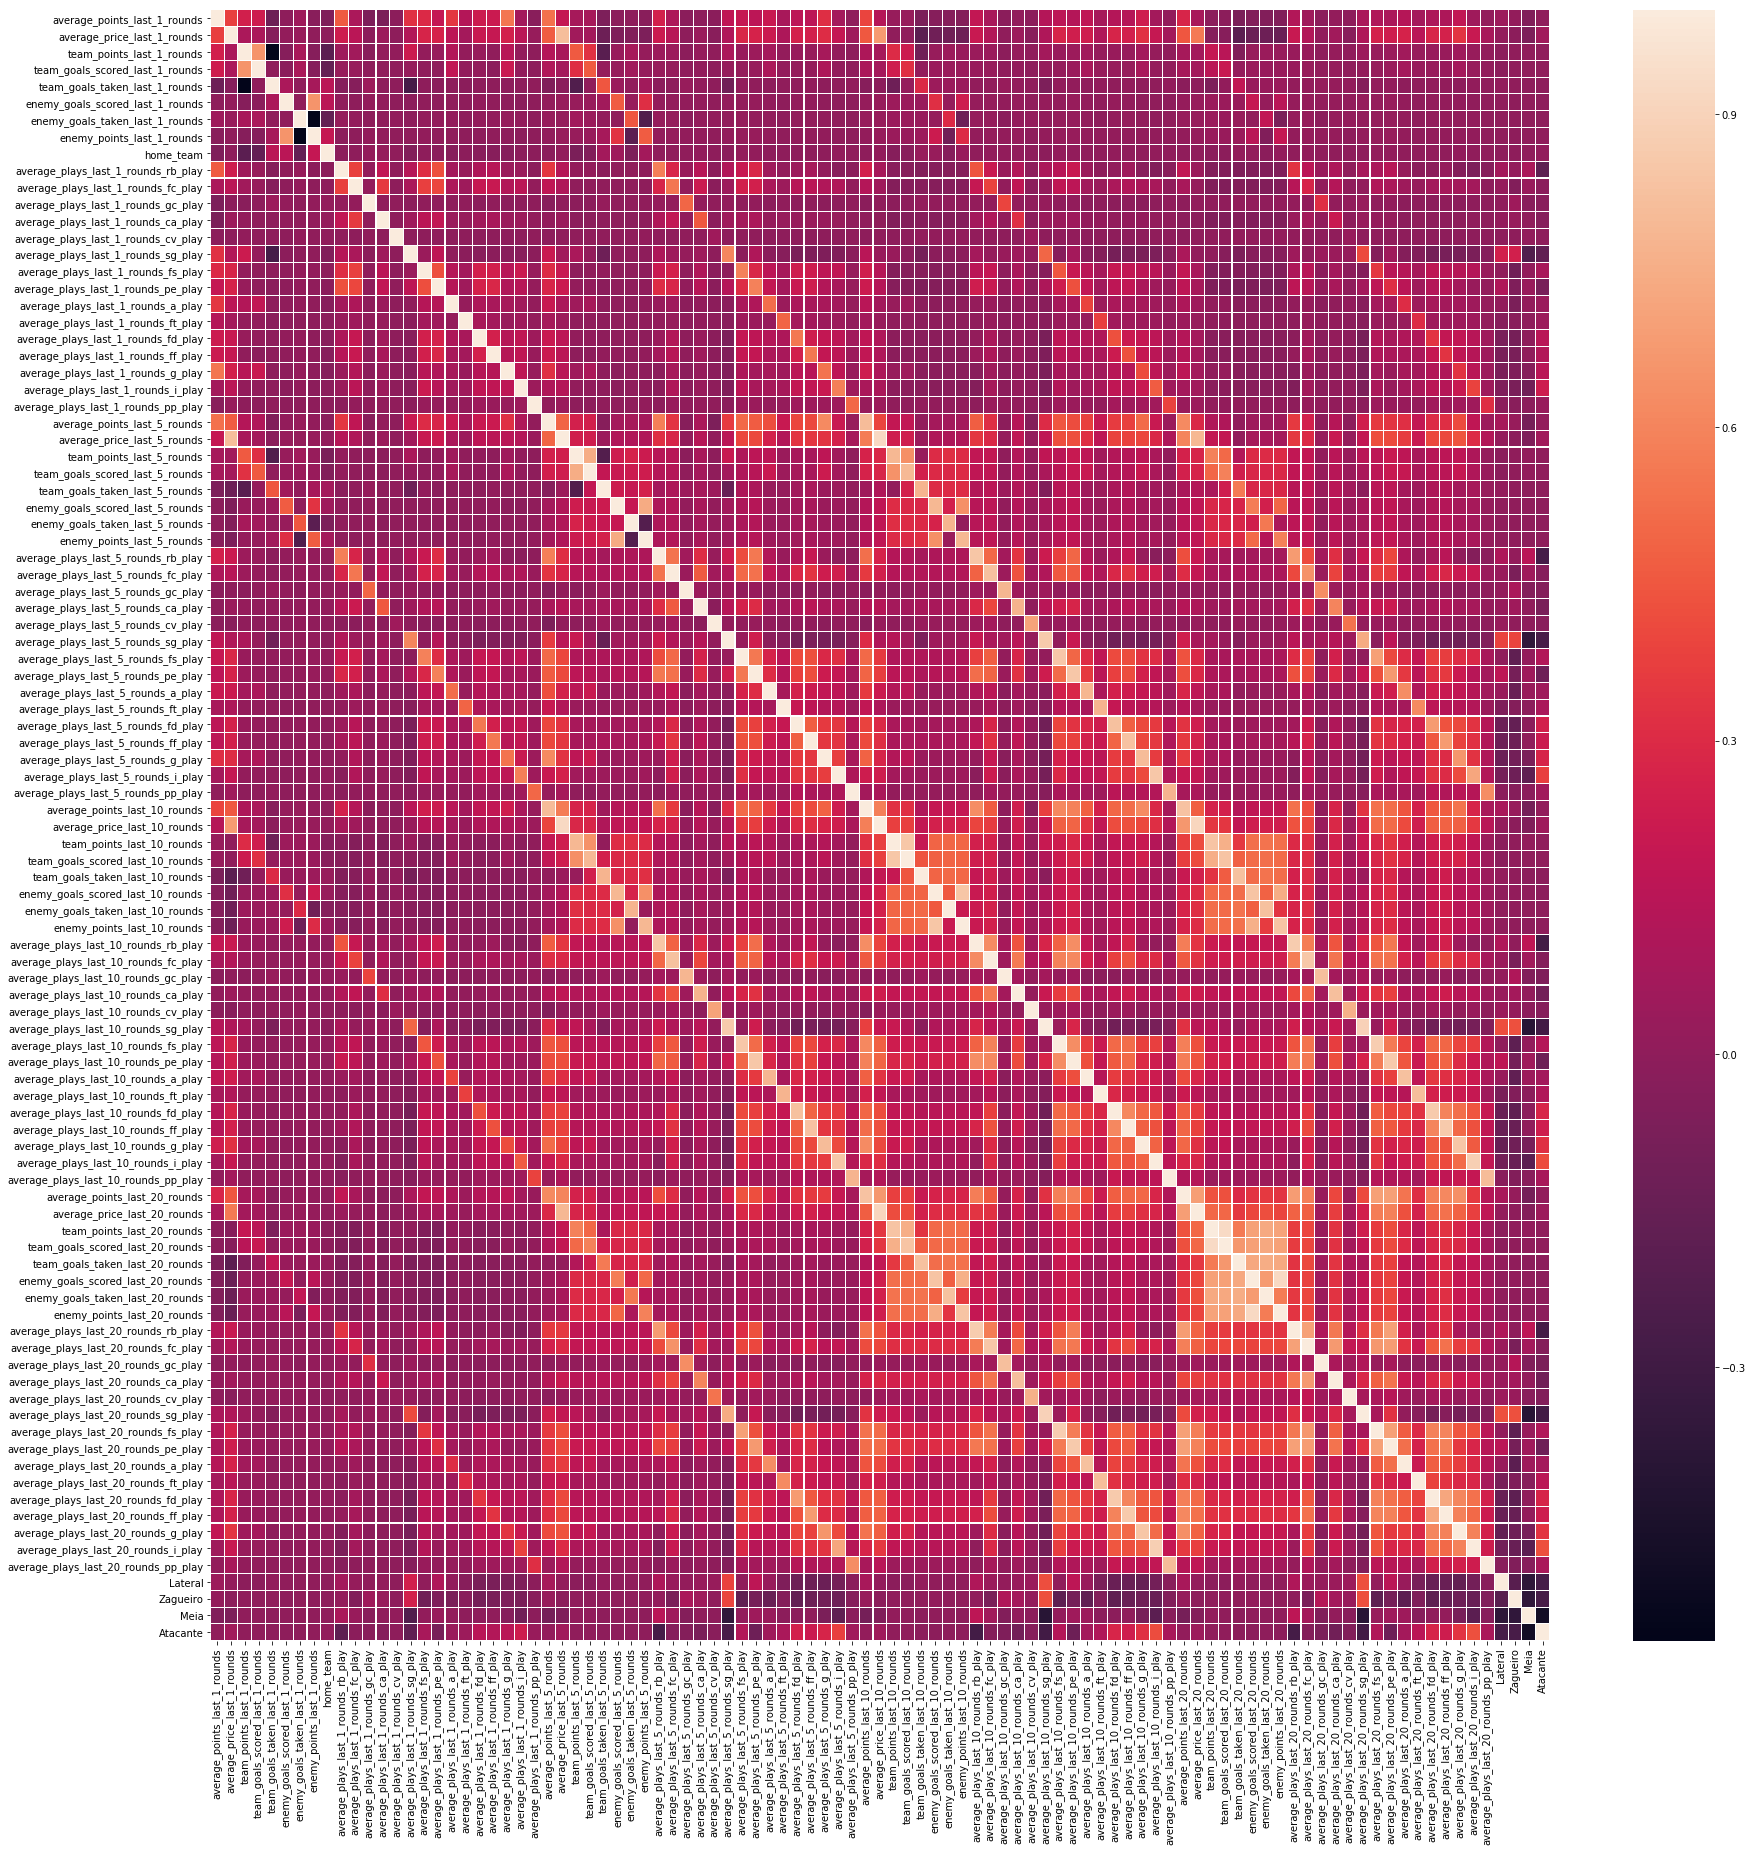

In [13]:
fs.corr_heatmap()

The optimal number of features is: 39 
Feature subset ranking: 
average_plays_last_5_rounds_fd_play...............1
average_plays_last_5_rounds_cv_play...............1
enemy_goals_taken_last_5_rounds...................1
average_plays_last_5_rounds_ft_play...............1
enemy_goals_scored_last_1_rounds..................1
average_plays_last_1_rounds_i_play................1
average_plays_last_1_rounds_ca_play...............1
team_goals_scored_last_1_rounds...................1
enemy_goals_scored_last_5_rounds..................1
average_plays_last_10_rounds_ca_play..............1
average_plays_last_5_rounds_gc_play...............1
enemy_points_last_1_rounds........................1
average_plays_last_1_rounds_a_play................1
average_plays_last_5_rounds_rb_play...............1
average_plays_last_1_rounds_pp_play...............1
average_plays_last_1_rounds_rb_play...............1
average_plays_last_5_rounds_i_play................1
team_goals_scored_last_5_rounds...................1


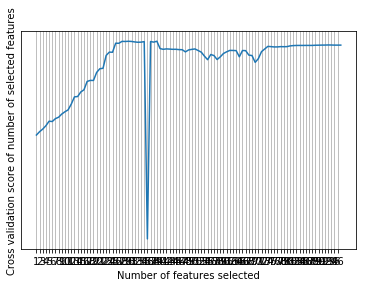

In [14]:
fs.RFECV(scoring='neg_mean_squared_error')

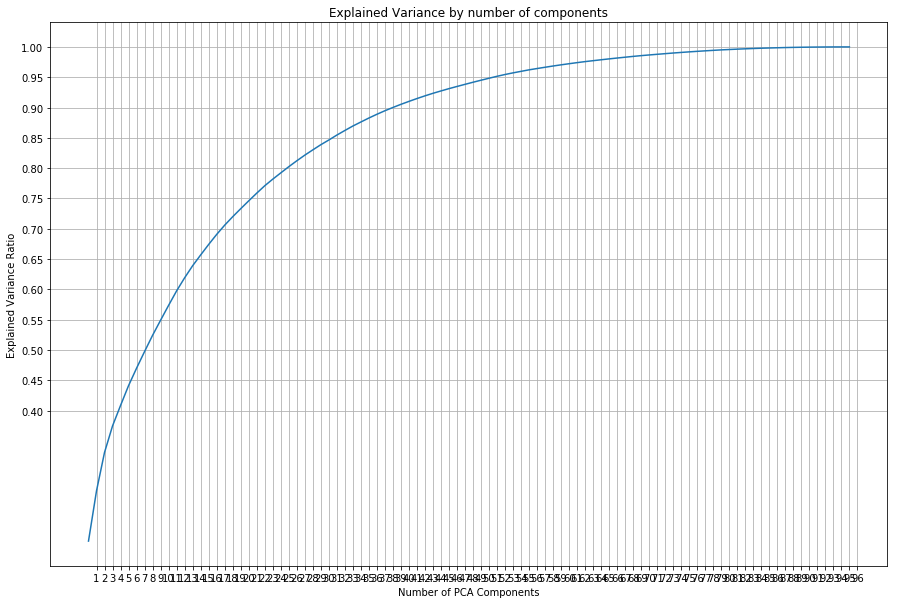

In [15]:
fs.plot_PCA()

## Train, validation, test

In [16]:
from data_science_utils.data_processing.train_test_split import TrainTest
tts = TrainTest(df, auxiliary)
tts.split_dataset(train_ratio=0.8)
tts.normalize_data()

/home/noixd/Projects/cartolaAPI/env_cartola/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
model = LinearRegression
model_params = {}
model, train_preds, train_eval = tts.evaluate_train(model, model_params)
test_preds, test_eval = tts.evaluate_test()

Evaluating Train Data: 
Prediction Std Dev: 0.936326698926
Prediction Avg: 2.58699504112
Desired Std Dev: 4.05575192235
Desired Avg: 2.58708470175
Explained Variance: 0.0532527155319
Mean Absolute error: 2.97420207273
RMS Error: 3.946284728815188
Median Abs Error: 2.36480290071
R2 Score: 0.0532527150432
Evaluating Test Data: 
Prediction Std Dev: 0.958511408378
Prediction Avg: 2.58309824427
Desired Std Dev: 4.04147627497
Desired Avg: 2.50574308844
Explained Variance: 0.0508079504971
Mean Absolute error: 2.97099582176
RMS Error: 3.938228166717009
Median Abs Error: 2.37635075228
R2 Score: 0.0504415985844


## Result Analysis

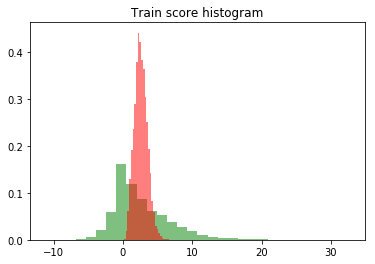

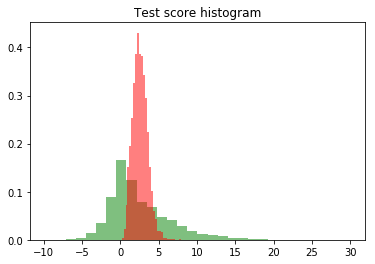

In [18]:
from data_science_utils.result_analysis.visualization import ResultsVisualization
rv = ResultsVisualization( y_test = tts.y_test, test_score=test_preds,
                          y_train = tts.y_train, train_score=train_preds, model=tts.model)
rv.score_hist()

In [19]:
from data_science_utils.result_analysis.evaluation_metrics import EvaluationMetrics
em = EvaluationMetrics(df=df, y_train=tts.y_train, y_test=tts.y_test,
                       train_score=train_preds, test_score=test_preds)

In [20]:
_ = em.eval_top(match_week=20, year=2016, number_of_players=50, real=True)

Top 50 real performances compared to expected performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 147.176424333
Real total points: 430.2
Prediction Std Dev: 0.933782185022
Prediction Avg: 2.94352848665
Desired Std Dev: 3.15156849838
Desired Avg: 8.604
Explained Variance: -0.0572165304801
Mean Absolute error: 5.66047151335
RMS Error: 6.522393602451296
Median Abs Error: 4.80099299772
R2 Score: -3.28312259225






In [21]:
_ = em.eval_top(match_week=20, year=2016, number_of_players=50, real=False)

Top 50 Predicted players metrics compared to real performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 193.330232926
Real total points: 191.6
Prediction Std Dev: 0.558287393369
Prediction Avg: 3.86660465853
Desired Std Dev: 4.11676766408
Desired Avg: 3.832
Explained Variance: -0.00106328070906
Mean Absolute error: 3.10079097742
RMS Error: 4.119101082235553
Median Abs Error: 2.7814453125
R2 Score: -0.00113393790867






In [22]:
best_real_team, _ = em.get_best_team(match_week=20, year=2016, team_formation=(2,2,3,3), real=True)
best_predicted_team, _ = em.get_best_team(match_week=20, year=2016, team_formation=(2,2,3,3), real=False)

Selecting best real performing team for match_week 20 on year 2016 
Evaluating Data: 
Predited total points: 28.5620915071
Real total points: 137.6
Prediction Std Dev: 0.505015597268
Prediction Avg: 2.85620915071
Desired Std Dev: 1.8537529501
Desired Avg: 13.76
Explained Variance: 0.0966778881835
Mean Absolute error: 10.9037908493
RMS Error: 11.045217561913544
Median Abs Error: 10.2708904587
R2 Score: -34.5013476283




Selecting best predicted performing team for match_week 20 on year 2016 
Evaluating Data: 
Predited total points: 47.3001286165
Real total points: 39.3
Prediction Std Dev: 0.483542838675
Prediction Avg: 4.73001286165
Desired Std Dev: 2.99601401866
Desired Avg: 3.93
Explained Variance: 0.0612948024522
Mean Absolute error: 2.74717444733
RMS Error: 3.010968665150487
Median Abs Error: 2.86569026335
R2 Score: -0.0100079435967






In [23]:
best_real_team.style

,scout_id,match_week,player_id,team_id,position_id,score,preds,name,year,has_played
38508,88754,20,62130,266,2,14.1,3.54696,William Matheus,2016,True
4259,27304,20,42145,275,2,11.3,2.8138,Egídio,2016,True
7270,31061,20,78248,277,3,13.2,3.2618,Gustavo Henrique,2016,True
36311,84083,20,72605,275,3,12.2,2.21126,Vitor Hugo,2016,True
17191,41141,20,78548,277,4,16.5,2.65682,Jean Mota,2016,True
7742,32814,20,91102,287,4,13.7,2.212,Flávio,2016,True
42668,96631,20,38421,283,4,12.2,2.26009,Rafinha,2016,True
17773,50114,20,38910,277,5,17.6,3.36678,Ricardo Oliveira,2016,True
11062,38061,20,90302,284,5,13.9,2.73885,Pedro Rocha,2016,True
23472,59631,20,86757,284,5,12.9,3.49373,Everton,2016,True


In [24]:
best_predicted_team.style

,scout_id,match_week,player_id,team_id,position_id,score,preds,name,year,has_played
11772,39182,20,68725,287,2,8.7,5.75887,Diego Renan,2016,True
41220,93282,20,71892,266,2,7.1,4.64364,Wellington Silva,2016,True
11919,39416,20,80853,284,3,4.1,4.66976,Pedro Geromel,2016,True
5068,24585,20,68887,266,3,6.7,3.90975,Gum,2016,True
32750,76137,20,87863,283,4,3.8,5.31038,Arrascaeta,2016,True
16472,47969,20,87999,266,4,0.7,4.94637,Gustavo Scarpa,2016,True
22130,58393,20,37688,266,4,1.2,4.42684,Cícero,2016,True
36482,84370,20,68952,287,5,6.2,4.65194,Marinho,2016,True
5706,29592,20,42116,283,5,1.2,4.49569,Willian,2016,True
35796,83225,20,68930,287,5,-0.4,4.4869,Kieza,2016,True


In [25]:
for position in range(2,6):
    em.eval_top(position=position, match_week=20, year=2016, real=True, number_of_players=5)

Top 5 real performances compared to expected performance for position 2 on round 20 on year 2016
Evaluating Data: 
Predited total points: 19.1661775895
Real total points: 53.2
Prediction Std Dev: 1.14122132273
Prediction Avg: 3.8332355179
Desired Std Dev: 2.03725305252
Desired Avg: 10.64
Explained Variance: -0.943737956268
Mean Absolute error: 6.8067644821
RMS Error: 7.375590330844197
Median Abs Error: 7.9400066696
R2 Score: -12.1070096204




Top 5 real performances compared to expected performance for position 3 on round 20 on year 2016
Evaluating Data: 
Predited total points: 14.6383455583
Real total points: 50.0
Prediction Std Dev: 0.40307806762
Prediction Avg: 2.92766911165
Desired Std Dev: 2.34350165351
Desired Avg: 10.0
Explained Variance: -0.142122784932
Mean Absolute error: 7.07233088835
RMS Error: 7.502693018451732
Median Abs Error: 6.56217463835
R2 Score: -9.24952704463




Top 5 real performances compared to expected performance for position 4 on round 20 on year 2016
Evalu

In [26]:
for position in range(2,6):
    em.eval_top(position=position, match_week=20, year=2016, real=False, number_of_players=5)

Top 5 Predicted players metrics compared to real performance for position 2 on round 20 on year 2016
Evaluating Data: 
Predited total points: 22.5680330583
Real total points: 26.2
Prediction Std Dev: 0.687958748091
Prediction Avg: 4.51360661165
Desired Std Dev: 3.89543322366
Desired Avg: 5.24
Explained Variance: 0.224744771312
Mean Absolute error: 3.07798180267
RMS Error: 3.5059492718570606
Median Abs Error: 2.94112971647
R2 Score: 0.189972565845




Top 5 Predicted players metrics compared to real performance for position 3 on round 20 on year 2016
Evaluating Data: 
Predited total points: 19.0746248551
Real total points: 16.4
Prediction Std Dev: 0.457334488911
Prediction Avg: 3.81492497103
Desired Std Dev: 2.56
Desired Avg: 3.28
Explained Variance: 0.129641808453
Mean Absolute error: 2.18823890046
RMS Error: 2.447473016960719
Median Abs Error: 2.58079411165
R2 Score: 0.0859795885085




Top 5 Predicted players metrics compared to real performance for position 4 on round 20 on year 201

In [27]:
_ = em.get_performance_without_outliers(match_week=20, year=2016, real=True)

Evaluation performance without the top and bottom 10 % performing players for round 20 on year 2016
Top 26186 real performances compared to expected performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 486.409312044
Real total points: 393.5
Prediction Std Dev: 0.941358180462
Prediction Avg: 2.5466456128
Desired Std Dev: 2.42327024898
Desired Avg: 2.06020942408
Explained Variance: 0.0580636107568
Mean Absolute error: 2.03230814918
RMS Error: 2.401644329030221
Median Abs Error: 2.04069026335
R2 Score: 0.0177688990131






In [28]:
points_list = em.get_model_average_score()

Selecting best predicted performing team for match_week 2 on year 2015 
Selecting best predicted performing team for match_week 2 on year 2016 
Selecting best predicted performing team for match_week 2 on year 2017 
Selecting best predicted performing team for match_week 3 on year 2015 
Selecting best predicted performing team for match_week 3 on year 2016 
Selecting best predicted performing team for match_week 3 on year 2017 
Selecting best predicted performing team for match_week 4 on year 2015 
Selecting best predicted performing team for match_week 4 on year 2016 
Selecting best predicted performing team for match_week 4 on year 2017 
Selecting best predicted performing team for match_week 5 on year 2015 
Selecting best predicted performing team for match_week 5 on year 2016 
Selecting best predicted performing team for match_week 5 on year 2017 
Selecting best predicted performing team for match_week 6 on year 2015 
Selecting best predicted performing team for match_week 6 on yea

In [29]:
print(np.mean(points_list))
print(np.std(points_list))
print(np.max(points_list))
print(np.min(points_list))

46.4737373737
17.0549295925
97.3
13.0
